# <font color='red'> 0 - ENTENDIMENTO DO NEGÓCIO

### <font color='#F37126'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

<font color='green'> **Objetivo:**
- Fazer modelo para classificar funcionários com a probabilidade de ficar na empresa ou de sair.

<font color='green'> **O contexto:**

- Contratar e reter funcionários são tarefas extremamente complexas que exigem capital, tempo e habilidades.
- Pequenos empresários gastam em torno de 40% das horas de trabalho em tarefas que não geram receitas, como a contratação.
- Empresas gastam de 15% a 20% do salário dos funcionários para recrutar um novo candidato.
- Uma empresa média perde entre 1% e 2.5% de sua receita total no tempo que leva para treinar um novo funcionário.
- A contratação de um novo funcionário custa em média $7645 (em uma empresa com aproximadamente 500 funcionários).
- Demora mais ou menos 52 dias para um funcionário ocupar de fato sua nova posição.

Fonte: https://toggl.com/blog/cost-of-hiring-an-employee

<font color='green'> **Causa raiz do problema:**
- Dificuldade em manter as pessoas talentosas na empresa.

<font color='green'> **Stakeholder:**
- Gerente do departamento de Recursos Humanos.

<font color='green'> **O formato da solução:**
- Granularidade
    - Por cada funcionário da empresa.
- Tipo do problema
    - Problema de classificação binária
- Potenciais métodos
    - Random forest, Regressão Logistica
- Formato da entrega
    - Tabela em excel
- Definição
    - Usar Machine Learning para classificar quais funcionários tem uma tendência de para sair do emprego.

### <font color='#F37126'> PLANEJAMENTO DA SOLUÇÃO

O planejamento da solução para este projeto se baseia no método CRISP-DM (Cross Industry Standard Process for Data Mining), que é uma metodologia cíclica e flexivel voltada para resolução de problemas que envolvem grande volume de dados que permite a entrega rápida de valor para os times de negócio.

0. **ENTENDIMENTO DO NEGÓCIO**


1. **IMPORTANDO AS BIBLIOTECAS**


2. **COLETA DOS DADOS**    


3. **ANÁLISE EXPLORATÓRIA DOS DADOS**
    - **1:** Leitura dos dados
    - **2:** Colunas
    - **3:** Dimensões de dados
    - **4:** Verificando o balanceamento da variável alvo
    - **5:** Tipos de dados
    - **6:** Verificando dados nulos
    - **7:** Estatística descritiva
    - **8:** Verificando outliers
    - **9:** Seleção das Variáveis
    
    
4. **PRÉ-PROCESSAMENTO**
    - **1:** Separação do conjunto de dados
    - **2:** Transformação
    
 
5. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
    - **1:** Balanceamento dos dados
    - **2:** Regressão logística
    - **3:** Random forest
    - **4:** Comparar o desempenho dos modelos
    
    
6. **AJUSTE FINO DE HIPERPARÂMETROS**
    - **1:** GridSearchCV
    - **2:** Comparar o desempenho dos modelos
    - **3:** Modelo final
    
7. **AVALIAÇÃO DO ALGORITMO**  


8. **IMPLEMENTAR O MODELO PARA A PRODUÇÃO**
    - **1:** Salvando o arquivo
    - **2:** Aplicando uma simulação


9. **PRÓXIMOS PASSOS**

# <font color='red'> 1 - IMPORTANDO AS BIBLIOTECAS

In [1]:
import warnings
import time
import pickle
import pandas                as pd
import numpy                 as np
import seaborn               as sns
import matplotlib.pyplot     as plt

from pyod.models.knn         import KNN
from scipy                   import stats              as ss
from sklearn                 import model_selection    as ms
from sklearn                 import metrics            as mt

from sklearn.preprocessing   import OneHotEncoder, MinMaxScaler
from sklearn.compose         import ColumnTransformer
from imblearn.under_sampling import ClusterCentroids
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from yellowbrick.classifier  import ConfusionMatrix
from sklearn.metrics         import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

# <font color='red'> 2 - COLETA DOS DADOS

In [3]:
df_funcionario = pd.read_csv('Datasets/Human_Resources.csv')

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# <font color='red'> 3 - ANÁLISE EXPLORATÓRIA DOS DADOS

### <font color='#F37126'> 3.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [5]:
df_funcionario.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df_funcionario.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


### <font color='#F37126'> 3.2 Colunas

**Visualizando cabeçalho do dataframe**

In [7]:
print(df_funcionario.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### <font color='#F37126'> 3.3. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [8]:
df_funcionario.shape

(1470, 35)

In [9]:
# Valores únicos
df_funcionario.apply(lambda x: x.unique().shape[0])

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
unique_numbers = list(set(df_funcionario.Attrition))
print(unique_numbers)

['No', 'Yes']


**Nota:**
- No = Não tem chance de sair da empresa
- Yes = Chance em sair da empresa

### <font color='#F37126'> 3.4. Verificando o balanceamento da variável alvo

**Definição:**
- O equilíbrio de uma base de dados se refere à distribuição das classes nessa base. Uma base de dados é considerada balanceada quando as classes estão distribuídas de forma similar, ou seja, quando não há uma classe majoritária. Já uma base de dados é considerada desbalanceada quando há uma classe majoritária.

In [11]:
# Para virificar o balanceamento - Se as contagens são muito desiguais, isso pode indicar um desequilíbrio.
print(df_funcionario.Attrition.value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [12]:
# normalize=True calcula a proporção de cada classe
print(df_funcionario.Attrition.value_counts(normalize=True))

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


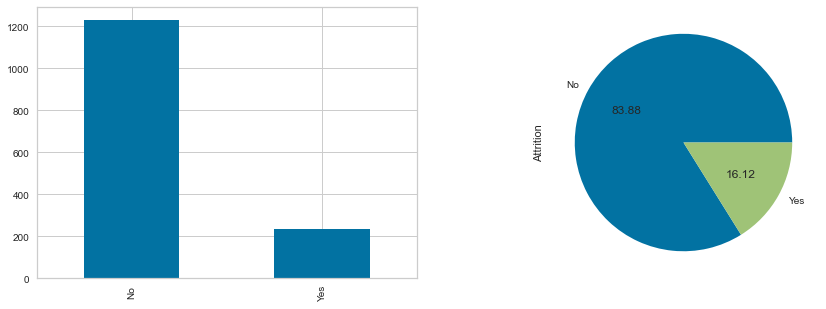

In [13]:
# Visualizando graficamente
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df_funcionario.Attrition.value_counts().plot.bar();

plt.subplot(1,2,2)
df_funcionario.Attrition.value_counts().plot.pie(autopct='%.2f');

**Nota:**
- A classe majoritária representa **84%** das amostras e a classe minoritária  representa **16%** dos clientes na base de dados, então temos uma base de dados desbalanceada.

- Não há um valor específico ou uma regra geral para determinar quando uma base de dados está desbalanceada em termos de proporção de amostras de cada classe. Isso vai depender do contexto do problema e do que é considerado um desequilíbrio aceitável.

### <font color='#F37126'> 3.5. Tipos de dados

**Verificando o tipo das colunas**

In [14]:
df_funcionario.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### <font color='#F37126'> 3.6. Verificando dados nulos

**Verificando dados nulos**

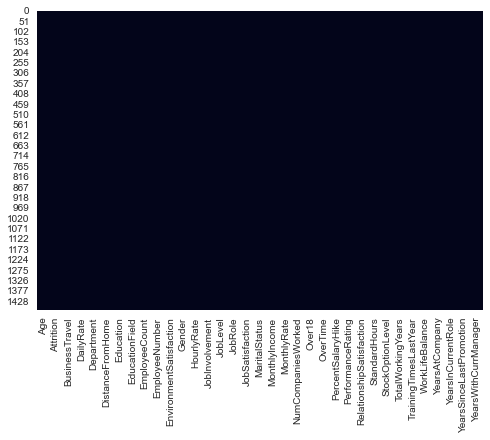

In [15]:
sns.heatmap(df_funcionario.isnull(), cbar=False);

In [16]:
# Conta a quantidade de missing values totais da base.
df_funcionario.isnull().sum().sum()

0

### <font color='#F37126'> 3.7. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

In [17]:
num_dados = df_funcionario.select_dtypes( include= ['int64','float64'] )
cat_dados = df_funcionario.select_dtypes( exclude= ['int64','float64'])

In [18]:
df_funcionario.describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


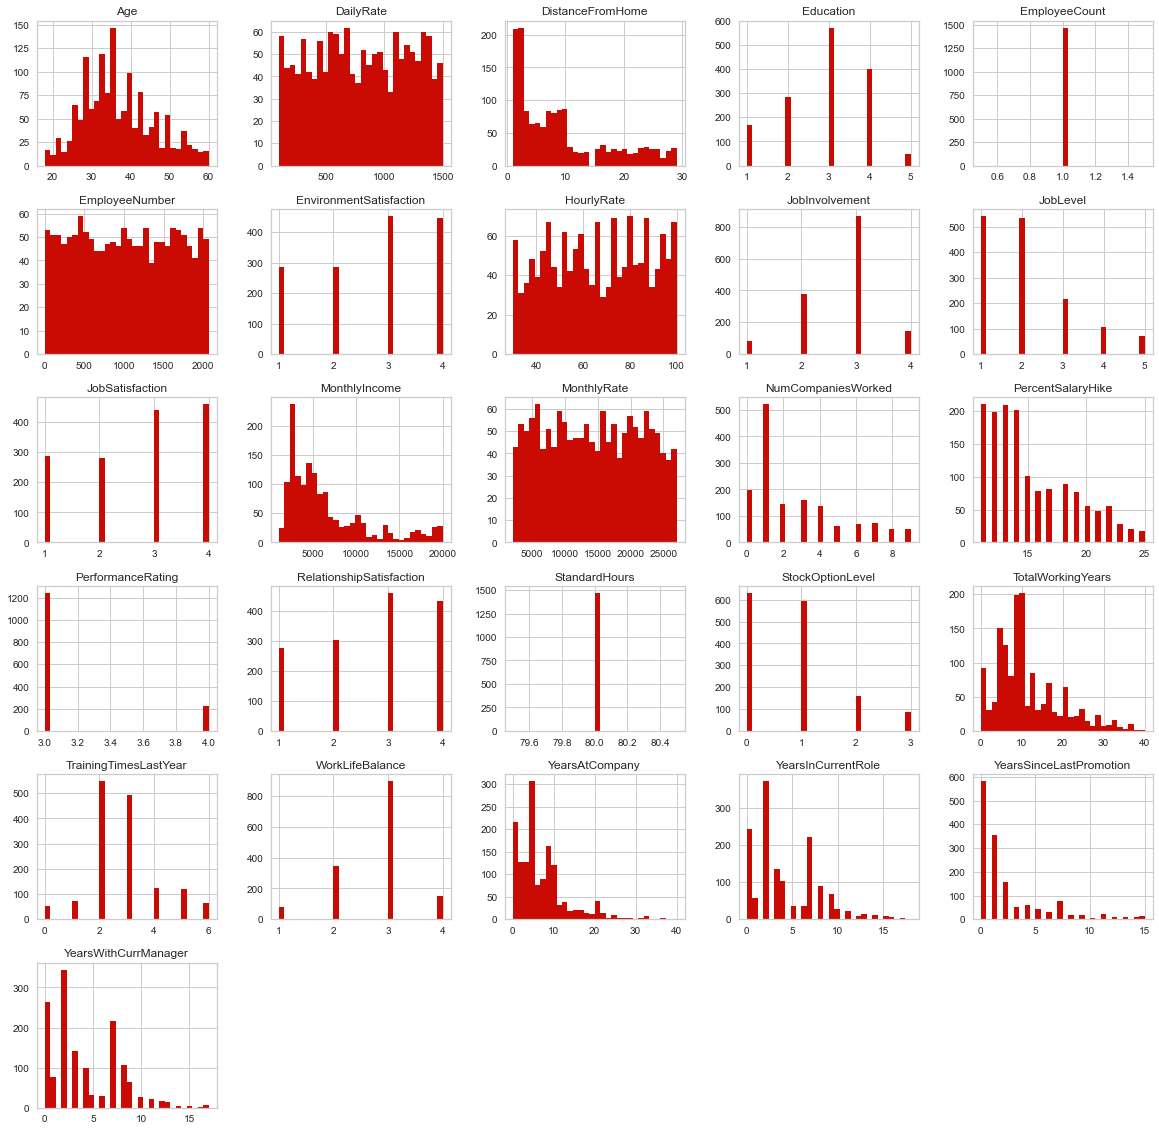

In [19]:
# Histograma para ver a distribuição dos dados
df_funcionario.hist(bins=30, figsize=(20,20),color='r');

**Nota:**

- Age: A maior concentração de pessoas nesta empresa tem a idade entre 25 à 40 anos.
- Attrition: De acordo com a classe que queremos prever, mostra que temos uma grande maioria de pessoas em torno de 1200 que não tem chances de sair da empresa e em torno de 220 que tem chance de sair da empresa.
- Daily_Rate: Podemos observar que os dados estão em uma distribuição dos dados bem uniforme.
- Distance_From_Home:Podemos perceber que a maioria das pessoas moram próximo da empresa.
- Education: A maioria está no nível 3, que as pessoas com faculdade.
- Employee_Count: Olhando o gráfico, podemos concluir que podemos apagar, porque todos possuem o mesmo valor.
- Environment_Satisfaction: Podemos observar as notas que os funcionarios deram quando foi feito a pesquisa pelo RH.
- Monthly_Income: Podemos notar que a grande maioria das pessoas ganham até 5K e poucas pessoas que ganham mais que 15K.
- Over18: Também tem o mesmo padrão do Employee_Count, todas as pessoa tem mais de 18 anos.
- Standard_Hours: Segue o mesmo padrão de Employee_Count e Over18, também é um indicativo que podemos apagar estes dados.
- Years_At_Company: A maiora das pessoas estão entre o à 10 anos que trabalham na mesma empresa.

### <font color='#F37126'> 3.8. Verificando outliers

#### <font color='#D2691E'> Identificando Outliers na base de dados

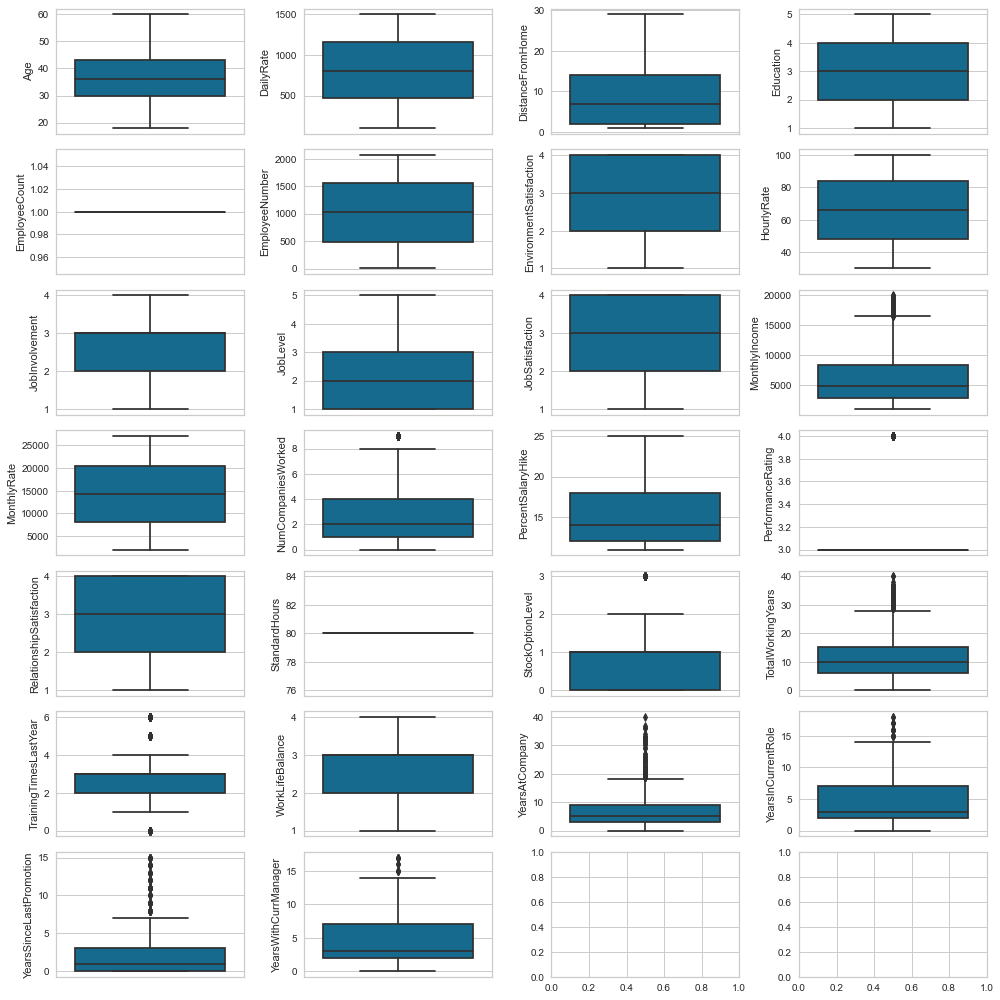

In [20]:
# Carregar variaveis para plot
variaveis_numericas = []
for i in num_dados:
        if num_dados.dtypes[i] == 'int64' or num_dados.dtypes[i] == 'float64':            
            #print(i, ':' , num_dados.dtypes[i]) 
            variaveis_numericas.append(i)  
    
    
plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(7, 4) # linhas e  colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = num_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show() 

**Nota:**
- Conseguimos identificar a presença de outliers nas variáveis, mas não identificamos qual registro é outlier.
- Mas nem tudo que está demonstrado, pode ser um outlier.
- Uma forma de listar estes registros é usando a biblioteca PYOD que é uma biblioteca Python para detecção de outlier (anomalia) em dados.

#### <font color='#D2691E'> Identificando os registros que são Outliers com a Biblioteca PYOD

- O algoritmo KNN é usado nesta biblioteca para medir as distância e calcular outilers.

In [21]:
# Instanciando o objeto KNN 
detector = KNN()

# Treinando um detector de OUTLIERS
detector.fit(num_dados)

# A probiedade LABELS_ retorna um ARRAY com 0 e 1 - 0 significa que NÃO é outlier / 1 significa que É outlier
previsoes = detector.labels_

In [22]:
# Fazendo uma contagem para identificar os outliers
np.unique(previsoes, return_counts = True)

(array([0, 1]), array([1323,  147], dtype=int64))

In [23]:
# Criando uma lista somente com os outliers
outliers = []
for i in range(len(previsoes)):
    #print(i)
    if previsoes[i] == 1:
        outliers.append(i)

In [24]:
# Fazendo um SLICE no arquivo original filtrando todas as linhas que são outlier (lista de outlier) e todas colunas
lista_outliers = num_dados.iloc[outliers,:]
display(lista_outliers)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,1219,2,4,1,23,1,78,2,4,4,15427,22021,2,16,3,3,80,0,31,3,3,25,8,3,7
22,34,419,7,4,1,28,1,53,3,3,2,11994,21293,0,11,3,3,80,0,13,4,3,12,6,2,11
25,53,1282,5,3,1,32,3,58,3,5,3,19094,10735,4,11,3,4,80,1,26,3,2,14,13,4,8
29,46,705,2,4,1,38,2,83,3,5,1,18947,22822,3,12,3,4,80,0,22,2,2,2,2,2,1
43,27,994,8,3,1,56,4,37,3,3,3,8726,2975,1,15,3,4,80,0,9,0,3,9,8,1,7
65,55,836,8,3,1,84,4,33,3,4,3,14756,19730,2,14,3,3,80,3,21,2,3,5,0,0,2
67,45,1339,7,3,1,86,2,59,3,3,1,9724,18787,2,17,3,3,80,1,25,2,3,1,0,0,0
77,45,193,6,4,1,101,4,52,3,3,1,13245,15067,4,14,3,2,80,0,17,3,4,0,0,0,0
82,55,111,1,2,1,106,1,70,3,3,4,10239,18092,3,14,3,4,80,1,24,4,3,1,0,1,0
98,58,682,10,4,1,131,4,37,3,4,3,13872,24409,0,13,3,3,80,0,38,1,2,37,10,1,8


In [25]:
num_dados.shape,lista_outliers.shape

((1470, 26), (147, 26))

**Nota:**
- Registros que não são outliers: 1.323
- Registros que o algoritmo classificou como outliers: 147
    
Devemos depois fazer uma análise mais profunda porque nem tudo pode ser um outlier.

#### <font color='#D2691E'> Detecção de outlier usando teste de hipóteses

O **teste de hipóteses** é uma técnica comum para detectar outliers no aprendizado de máquina. O teste de hipótese é um método de testar uma afirmação sobre um parámetro em uma população, usando dados medidos de uma amostra.


Um dos maiores problemas do aprendizado de máquina é um outlier. Se você negligenciar os valores discrepantes nos dados, isso resultará no baixo desempenho do seu modelo de aprendizado de máquina, da sua máquina preditiva.

Vamos usar o Teste de Grubbs, para detectar outlier.

In [26]:
# Criando um detector de outliers

def outliers_test(data):
    n_cols = data.shape[1]
    for col in range(n_cols):
        x = data.iloc[:, col]
        
        n = len(x)
        mean_x = np.mean(x)
        sd_x = np.std(x)
        
        if sd_x == 0:
            print(f'A coluna {col + 1} não pode ser testada, pois a variância é zero.')
            continue
        
        numerator = max(abs(x - mean_x))
        g_calculated = numerator/sd_x
        print(f'Grubbs Valor Calculado - Coluna {col + 1}: {g_calculated}')
        
        t_value = ss.t.ppf(1 - 0.05 / (2 * n), n - 2)
        g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
        print(f'Grubbs Valor Crítico - Coluna {col + 1}: {g_critical}')
        
        if g_critical > g_calculated:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers')
        else:
            print(f'Para a variável X na coluna {col + 1}, observamos que o valor calculado é Maior que o valor Crítico. Confirmamos a hipótese de que há outliers')

# Carregando a base de dados
data = num_dados

# Obtendo o nome de todas as colunas
columns = data.columns

# Loop para percorrer cada coluna
for column in columns:
    print("Testando a coluna:", column)
    temp = data[column]
    temp = temp.to_frame()
    outliers_test(temp)
    print("\n")

Testando a coluna: Age
Grubbs Valor Calculado - Coluna 1: 2.5268855788880864
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: DailyRate
Grubbs Valor Calculado - Coluna 1: 1.7365756967097488
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: DistanceFromHome
Grubbs Valor Calculado - Coluna 1: 2.444129148682291
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o valor calculado é Menor que o valor Crítico. Aceitamos a hipótese de que não há outliers


Testando a coluna: Education
Grubbs Valor Calculado - Coluna 1: 2.0385242560157804
Grubbs Valor Crítico - Coluna 1: 4.133386214427365
Para a variável X na coluna 1, observamos que o

**Nota:**
- Usando o Teste de Grubbs, para detectar outlier, foi verificado que na base de dados não temos outliers.

### <font color='#F37126'> 3.9. Seleção das Variáveis

In [27]:
# Apagando as informações
df_funcionario.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [28]:
df_funcionario.shape

(1470, 31)

# <font color='red'> 4 - PRÉ-PROCESSAMENTO

### <font color='#F37126'> 4.1. Separação do conjunto de dados

In [29]:
print('Quantidade de linhas: ' + str(df_funcionario.shape[0]))
print('Quantidade de colunas: ' + str(df_funcionario.shape[1]))

Quantidade de linhas: 1470
Quantidade de colunas: 31


In [30]:
X = df_funcionario.drop(['Attrition'], axis=1)
y = df_funcionario['Attrition']

In [31]:
# Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, 
                                                       test_size=0.2, 
                                                       random_state=42,
                                                       stratify=y)

In [32]:
# Separação entre Treino e validação
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, 
                                                     test_size=0.2, 
                                                     random_state=42)

In [33]:
# Dicionário - Original
d_orig = {'Treino': X.shape,
        'Teste': y.shape}

In [34]:
# Dicionário - Treino
d_tr = {'Treino': X_train.shape,
        'Teste': y_train.shape}

In [35]:
# Dicionário - Validação
d_val = {'Treino': X_val.shape,
        'Teste': y_val.shape}

In [36]:
# Dicionário - Teste
d_test = {'Treino': X_test.shape,
        'Teste': y_test.shape}

In [37]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux = pd.DataFrame({'Dados Original':pd.Series(d_orig),
                       'Dados Treino':pd.Series(d_tr),
                       'Dados Validação':pd.Series(d_val),
                       'Dados Teste':pd.Series(d_test)})

In [38]:
display(df_aux)

,Dados Original,Dados Treino,Dados Validação,Dados Teste
Treino,"(1470, 30)","(940, 30)","(236, 30)","(294, 30)"
Teste,"(1470,)","(940,)","(236,)","(294,)"


### <font color='#F37126'> 4.2. Transformação

#### <font color='#D2691E'> Dados de treino

##### <font color='#DAA520'> Aplicando OneHotEncoder nos atributos categóricos

**Vamos transformar:**
- 0 = Não tem chance de sair da empresa
- 1 = Chance em sair da empresa

In [39]:
y_train = y_train.apply(lambda x: 1 if x == 'Yes' else 0)

In [40]:
X_train['OverTime'] = X_train['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [41]:
# Identificação das features categóricas a serem codificadas
df_cat = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Criação do objeto preprocessor usando ColumnTransformer, que aplica OneHotEncoder nas features categóricas
# e mantém as demais features sem modificação (remainder='passthrough')
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), df_cat)], remainder='passthrough')

# Aplicação do preprocessor no conjunto de treino das features (X_train), codificando as features categóricas
# e mantendo as demais features sem modificação
df_aux = preprocessor.fit_transform(X_train)

**Nota:**
- O ColumnTransformer() permite aplicar transformações específicas para cada coluna ou subconjunto de colunas do conjunto de dados. Na linha ('encoder', OneHotEncoder(), categorical_features), o primeiro elemento é o rótulo (string) do objeto OneHotEncoder(), o segundo é o objeto OneHotEncoder() e o terceiro é a lista de nomes de colunas categóricas.
- "encoder" é apenas um rótulo (ou uma string) usado para identificar o objeto OneHotEncoder() dentro do ColumnTransformer().

In [42]:
# Obter os nomes das colunas transformadas
feature_names_encoded = preprocessor.named_transformers_['encoder'].get_feature_names_out(df_cat)

# Obter os nomes das colunas não transformadas
feature_names_remainder = list(X_train.drop(df_cat, axis=1).columns)

# Concatenar os nomes das colunas transformadas e não transformadas
feature_names = list(feature_names_encoded) + feature_names_remainder

# Converter a matriz de treino em um DataFrame com as colunas nomeadas
df_X_train = pd.DataFrame(df_aux, columns=feature_names)

In [43]:
df_X_train.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0,718.0,4.0,4.0,4.0,92.0,3.0,5.0,1.0,19943.0,18575.0,4.0,0.0,13.0,3.0,4.0,1.0,28.0,2.0,3.0,5.0,2.0,4.0,2.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,36.0,1120.0,11.0,4.0,2.0,100.0,2.0,2.0,4.0,6652.0,14369.0,4.0,0.0,13.0,3.0,1.0,1.0,8.0,2.0,2.0,6.0,3.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,48.0,530.0,29.0,1.0,1.0,91.0,3.0,3.0,3.0,12504.0,23978.0,3.0,0.0,21.0,4.0,2.0,1.0,15.0,3.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,1313.0,11.0,4.0,4.0,80.0,3.0,2.0,4.0,4507.0,8191.0,3.0,0.0,12.0,3.0,3.0,0.0,8.0,1.0,4.0,5.0,1.0,0.0,4.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,50.0,145.0,1.0,3.0,4.0,95.0,3.0,2.0,3.0,6347.0,24920.0,0.0,0.0,12.0,3.0,1.0,1.0,19.0,3.0,3.0,18.0,7.0,0.0,13.0


In [44]:
df_X_train.isnull().sum().sum()

0

In [45]:
df_X_train.shape

(940, 50)

**Nota:**
- Precisamos fazer a normalização nos dados, porque nós temos uma distância muito grande entre os valores e isso pode fazer que o algoritmo de uma prioridade maior nos atributos com os valores mais alto do que para os valores com atributos menores, por isso que devemos deixar eles na mesma escala. 

##### <font color='#DAA520'> Aplicando Rescaling nos atributos categóricos

In [46]:
# Normalização - deixar eles na mesma escala
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_X_train)

#### <font color='#D2691E'> Dados de Validação

##### <font color='#DAA520'> Aplicando OneHotEncoder nos atributos categóricos

**Vamos transformar:**
- 0 = Não tem chance de sair da empresa
- 1 = Chance em sair da empresa

In [47]:
y_val = y_val.apply(lambda x: 1 if x == 'Yes' else 0)

In [48]:
X_val['OverTime'] = X_val['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [49]:
# Identificação das features categóricas a serem codificadas
df_cat = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Criação do objeto preprocessor usando ColumnTransformer, que aplica OneHotEncoder nas features categóricas
# e mantém as demais features sem modificação (remainder='passthrough')
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), df_cat)], remainder='passthrough')

# Aplicação do preprocessor no conjunto de treino das features (X_val), codificando as features categóricas
# e mantendo as demais features sem modificação
df_aux = preprocessor.fit_transform(X_val)

**Nota:**
- O ColumnTransformer() permite aplicar transformações específicas para cada coluna ou subconjunto de colunas do conjunto de dados. Na linha ('encoder', OneHotEncoder(), categorical_features), o primeiro elemento é o rótulo (string) do objeto OneHotEncoder(), o segundo é o objeto OneHotEncoder() e o terceiro é a lista de nomes de colunas categóricas.
- "encoder" é apenas um rótulo (ou uma string) usado para identificar o objeto OneHotEncoder() dentro do ColumnTransformer().

In [50]:
# Obter os nomes das colunas transformadas
feature_names_encoded = preprocessor.named_transformers_['encoder'].get_feature_names_out(df_cat)

# Obter os nomes das colunas não transformadas
feature_names_remainder = list(X_val.drop(df_cat, axis=1).columns)

# Concatenar os nomes das colunas transformadas e não transformadas
feature_names = list(feature_names_encoded) + feature_names_remainder

# Converter a matriz de treino em um DataFrame com as colunas nomeadas
df_X_val = pd.DataFrame(df_aux, columns=feature_names)

In [51]:
df_X_val.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,37.0,1017.0,1.0,2.0,3.0,83.0,2.0,1.0,1.0,3920.0,18697.0,2.0,0.0,14.0,3.0,1.0,1.0,17.0,2.0,2.0,3.0,1.0,0.0,2.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,104.0,2.0,3.0,1.0,69.0,3.0,1.0,1.0,2074.0,26619.0,1.0,1.0,12.0,3.0,4.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0,1473.0,8.0,4.0,3.0,74.0,3.0,2.0,3.0,4522.0,2227.0,4.0,1.0,14.0,3.0,4.0,0.0,8.0,3.0,3.0,5.0,2.0,0.0,2.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.0,818.0,6.0,2.0,2.0,52.0,3.0,1.0,3.0,2267.0,25657.0,8.0,0.0,17.0,3.0,4.0,0.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.0,584.0,22.0,5.0,2.0,91.0,3.0,4.0,3.0,17426.0,18685.0,3.0,0.0,25.0,4.0,3.0,1.0,36.0,6.0,3.0,10.0,8.0,4.0,7.0


In [52]:
df_X_val.isnull().sum().sum()

0

In [53]:
df_X_val.shape

(236, 50)

**Nota:**
- Precisamos fazer a normalização nos dados, porque nós temos uma distância muito grande entre os valores e isso pode fazer que o algoritmo de uma prioridade maior nos atributos com os valores mais alto do que para os valores com atributos menores, por isso que devemos deixar eles na mesma escala. 

##### <font color='#DAA520'> Aplicando Rescaling nos atributos categóricos

In [54]:
# Normalização - deixar eles na mesma escala
scaler = MinMaxScaler()
X_val = scaler.fit_transform(df_X_val)

#### <font color='#D2691E'> Dados de teste

##### <font color='#DAA520'> Aplicando OneHotEncoder nos atributos categóricos

**Vamos transformar:**
- 0 = Não tem chance de sair da empresa
- 1 = Chance em sair da empresa

In [55]:
y_test = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

In [56]:
X_test['OverTime'] = X_test['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [57]:
# Identificação das features categóricas a serem codificadas
df_cat = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Criação do objeto preprocessor usando ColumnTransformer, que aplica OneHotEncoder nas features categóricas
# e mantém as demais features sem modificação (remainder='passthrough')
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), df_cat)], remainder='passthrough')

# Aplicação do preprocessor no conjunto de treino das features (X_test), codificando as features categóricas
# e mantendo as demais features sem modificação
df_aux = preprocessor.fit_transform(X_test)

**Nota:**
- O ColumnTransformer() permite aplicar transformações específicas para cada coluna ou subconjunto de colunas do conjunto de dados. Na linha ('encoder', OneHotEncoder(), categorical_features), o primeiro elemento é o rótulo (string) do objeto OneHotEncoder(), o segundo é o objeto OneHotEncoder() e o terceiro é a lista de nomes de colunas categóricas.
- "encoder" é apenas um rótulo (ou uma string) usado para identificar o objeto OneHotEncoder() dentro do ColumnTransformer().

In [58]:
# Obter os nomes das colunas transformadas
feature_names_encoded = preprocessor.named_transformers_['encoder'].get_feature_names_out(df_cat)

# Obter os nomes das colunas não transformadas
feature_names_remainder = list(X_test.drop(df_cat, axis=1).columns)

# Concatenar os nomes das colunas transformadas e não transformadas
feature_names = list(feature_names_encoded) + feature_names_remainder

# Converter a matriz de treino em um DataFrame com as colunas nomeadas
df_X_test = pd.DataFrame(df_aux, columns=feature_names)

In [59]:
df_X_test.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24.0,830.0,13.0,2.0,4.0,78.0,3.0,1.0,2.0,2033.0,7103.0,1.0,0.0,13.0,3.0,3.0,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,44.0,1117.0,2.0,1.0,1.0,72.0,4.0,1.0,4.0,2011.0,19982.0,1.0,0.0,13.0,3.0,4.0,1.0,10.0,5.0,3.0,10.0,5.0,7.0,7.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,688.0,7.0,3.0,3.0,44.0,2.0,3.0,4.0,11557.0,25291.0,9.0,0.0,21.0,4.0,3.0,1.0,10.0,3.0,2.0,5.0,4.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44.0,1199.0,4.0,2.0,3.0,92.0,4.0,5.0,1.0,19190.0,17477.0,1.0,0.0,14.0,3.0,4.0,2.0,26.0,4.0,2.0,25.0,9.0,14.0,13.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,36.0,318.0,9.0,3.0,4.0,79.0,2.0,1.0,3.0,3388.0,21777.0,0.0,1.0,17.0,3.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0


In [60]:
df_X_test.isnull().sum().sum()

0

In [61]:
df_X_test.shape

(294, 50)

**Nota:**
- Precisamos fazer a normalização nos dados, porque nós temos uma distância muito grande entre os valores e isso pode fazer que o algoritmo de uma prioridade maior nos atributos com os valores mais alto do que para os valores com atributos menores, por isso que devemos deixar eles na mesma escala. 

##### <font color='#DAA520'> Aplicando Rescaling nos atributos categóricos

In [62]:
# Normalização - deixar eles na mesma escala
scaler = MinMaxScaler()
X_test = scaler.fit_transform(df_X_test)

# <font color='red'> 5 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING

### <font color='#F37126'> 5.1. Balanceamento dos dados

**ClusterCentroids**

- Irá gerar novas amostras baseado no KMeans (que veremos em breve)
- Vai substituir um conjunto (cluster) de amostras pelo seu "centróide"
- Usando este método nós agrupamos os pontos em alguns grupos e pegamos o centro desses grupos e dessa forma evitamos a perda de informações, ao invés de pegar de forma aleatória.

In [63]:
# Definindo o ClusterCentroids
cc = ClusterCentroids(random_state=42)

In [64]:
# Criando a amostra dos dados
X_res, y_res = cc.fit_resample(X_train, y_train)

In [65]:
# Antes do balanceamento
print(y_train.value_counts())

0    794
1    146
Name: Attrition, dtype: int64


In [66]:
# Depois do balanceamento
print(y_res.value_counts())

0    146
1    146
Name: Attrition, dtype: int64


In [67]:
X_train = X_res
y_train = y_res

### <font color='#F37126'> 5.2. Regressão logística

In [68]:
# Criar a variável do algoritmo
rl = LogisticRegression()
# Treinamento
rl.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Fazendo a previsão
y_pred_rl = rl.predict(X_val)

In [70]:
# Matriz de confusão
cm_rl = confusion_matrix(y_val,y_pred_rl)
cm_rl

array([[143,  49],
       [ 11,  33]], dtype=int64)

0.7457627118644068

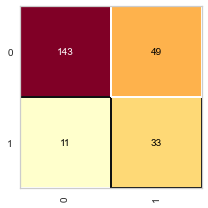

In [71]:
# Matriz de confusão
plt.figure(figsize=(3,3))
cm_rl = ConfusionMatrix(rl)
cm_rl.fit(X_train, y_train)
cm_rl.score(X_val, y_val)

**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo classificou corretamente **143** funcionários que não vão sair da empresa e **49** funcionários algoritmo errou porque de fato eles vão sair da empresa.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo classificou de forma erradamente **11** funcionários que não vão sair da empresa e **33** funcionários algoritmo acertou porque de fato eles vão sair da empresa.

In [72]:
# Resultado em porcentagem
print(classification_report(y_val,y_pred_rl))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       192
           1       0.40      0.75      0.52        44

    accuracy                           0.75       236
   macro avg       0.67      0.75      0.68       236
weighted avg       0.83      0.75      0.77       236



**Nota:**

**Acurácia - Cálculo da taxa de acerto**
- Toda vez que fazer uma classificação utilizando esta base de dados, quando queremos prever se ele vai ficar ou não na empresa, nós temos **75%** de chance em acertar está classificação.
- A métrica de acurácia não é muito boa métrica para representar a performance do algoritmo, quando temos dados desbalanceados, mas devemos usar também Recall e Precison.


**Métrica para toda base de dados**
- Temos um  f1-score de **68%** e essa métrica une precisão e recall a fim de trazer um número único que determine a qualidade geral do nosso modelo.



**Na classe 0 (Não tem chance de sair da empresa):**
  - O algoritmo consegue identificar corretamente **74%** (**Recall**) dos dos funcionários que não tem chance de sair da empresa e quando ele identifica, tem uma presisão de **93%** (**Precision**).
  
**Na classe 1 (Chance em sair da empresa):**
  - O algoritmo consegue identificar corretamente **75%** (**Recall**) dos funcionários que tem chance em sair da empresa e quando ele identifica, tem uma presisão de **40%** (**Precision**).

### <font color='#F37126'> 5.3. Random forest

In [73]:
# Criar a variável do algoritmo
rf = RandomForestClassifier()
# Treinamento
rf.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
# Fazendo a previsão
y_pred_rf = rf.predict(X_val)

In [75]:
# Matriz de confusão
cm_rf = confusion_matrix(y_val,y_pred_rf)
cm_rf

array([[ 23, 169],
       [  2,  42]], dtype=int64)

0.2754237288135593

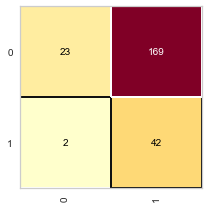

In [76]:
# Matriz de confusão
plt.figure(figsize=(3,3))
cm_rf = ConfusionMatrix(rf)
cm_rf.fit(X_train, y_train)
cm_rf.score(X_val, y_val)

**Nota:**

- Na classe 0 (Não tem chance de sair da empresa):
  - O algoritmo classificou corretamente **23** funcionários que não vão sair da empresa e **169** funcionários algoritmo errou porque de fato eles vão sair da empresa.
  
- Na classe 1 (Chance em sair da empresa):
  - O algoritmo classificou de forma errada **2** funcionários que não vão sair da empresa e **42** funcionários algoritmo acertou porque de fato eles vão sair da empresa.

In [77]:
# Resultado em porcentagem
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.12      0.21       192
           1       0.20      0.95      0.33        44

    accuracy                           0.28       236
   macro avg       0.56      0.54      0.27       236
weighted avg       0.79      0.28      0.23       236



**Nota:**

**Acurácia - Cálculo da taxa de acerto**
- Toda vez que fazer uma classificação utilizando esta base de dados, quando queremos prever se ele vai ficar ou não na empresa, nós temos **28%** de chance em acertar está classificação.
- A métrica de acurácia não é muito boa métrica para representar a performance do algoritmo, quando temos dados desbalanceados, mas devemos usar também Recall e Precison.


**Métrica para toda base de dados**
- Temos um  f1-score de **27%** e essa métrica une precisão e recall a fim de trazer um número único que determine a qualidade geral do nosso modelo.


**Na classe 0 (Não tem chance de sair da empresa):**
  - O algoritmo consegue identificar corretamente **12%** (**Recall**) dos dos funcionários que não tem chance de sair da empresa e quando ele identifica, tem uma presisão de **92%** (**Precision**).
  
**Na classe 1 (Chance em sair da empresa):**
  - O algoritmo consegue identificar corretamente **95%** (**Recall**) dos funcionários que tem chance em sair da empresa e quando ele identifica, tem uma presisão de **20%** (**Precision**).

### <font color='#F37126'> 5.4. Comparar o desempenho dos modelos

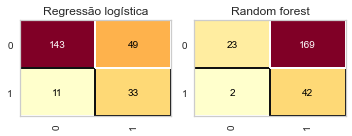

In [78]:
plt.figure(figsize=(5,2))

plt.subplot(1,2,1)
plt.title('Regressão logística',fontsize = 12)
cm_rl = ConfusionMatrix(rl)
cm_rl.score(X_val, y_val);

plt.subplot(1,2,2)
plt.title('Random forest',fontsize = 12)
cm_rf = ConfusionMatrix(rf)
cm_rf.score(X_val, y_val);

In [79]:
# Dicionário de métricas - Regressão logística
yhat_test = rl.predict( X_val )
acc_test = mt.accuracy_score( y_val, yhat_test )
m_rl = {'F1 Score': str(round(f1_score(y_val, yhat_test)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_val, yhat_test)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_val, yhat_test)*100,2)) + "%"}

In [80]:
# Dicionário de métricas - Random forest
yhat_test = rf.predict( X_val )
acc_test = mt.accuracy_score( y_val, yhat_test )
m_rf = {'F1 Score': str(round(f1_score(y_val, yhat_test)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_val, yhat_test)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_val, yhat_test)*100,2)) + "%"}

In [81]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux = pd.DataFrame({'Regressão Logistica':pd.Series(m_rl),
                       'Random Forest':pd.Series(m_rf)})

In [82]:
display(df_aux)

,Regressão Logistica,Random Forest
F1 Score,52.38%,32.94%
Acurácia,74.58%,27.54%
Precisão,40.24%,19.91%
Recall,75.0%,95.45%


- Como objetivo deste estudo é **classificar funcionários com a probabilidade de ficar na empresa ou de sair.**, o modelo usando a **Regressão Logistica** tem um melhor desempenho, que pode ajudar a diminuir o esforço do RH para encontrar estes funcionários com tendências de sair da empresa.

- Porém para mehorar a identificação de pessoas que tem a possibilidade ficar ou sair da empresa, que é o foco deste estudo de caso, vamos fazer ajuste fino de hiperparâmetros.

# <font color='red'> 6 - AJUSTE FINO DE HIPERPARÂMETROS

### <font color='#F37126'> 6.1. GridSearchCV

#### <font color='#D2691E'> Regressão logística

In [83]:
regressaoLogistica = LogisticRegression()

In [84]:
regressaoLogistica.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [85]:
# Valores para o grid de parametros
max_iter = np.array([100,110,120,130,140,150,200])
dual = np.array(['True','False'])
c = np.array([1.0,1.5,1.8,2.0])
tol = np.array([0.0001,0.001,0.01,0.1, 1])
penalty =  np.array(['l1','l2'])
intercept_scaling = np.array([1.0,2.0])
solver = np.array(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

# Grid de hiperparâmetros
grid_parametros = dict(max_iter = max_iter,
                       C = c,
                       penalty = penalty,
                       tol = tol,
                       solver = solver,
                       intercept_scaling = intercept_scaling)

regressaoLogistica = GridSearchCV(regressaoLogistica, grid_parametros, n_jobs = 3, cv=3)


# Treinando os modelos
inicio = time.time()
regressaoLogistica.fit(X_train, y_train)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rlog = pd.DataFrame(regressaoLogistica.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {regressaoLogistica.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {regressaoLogistica.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rlog.shape[0])

Acurácia em Treinamento: 78.78%

Hiperparâmetros Ideais: {'C': 2.0, 'intercept_scaling': 1.0, 'max_iter': 120, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}

Tempo de Treinamento do Modelo:  80.37

Numero de treinamentos realizados:  2800


In [86]:
# Dicionário de métricas e metadados
modelo_rl = {'Melhores Hiperparametros':regressaoLogistica.best_params_,
               'Numero de Modelos Treinados': treinos_rlog.shape[0],  
               'Melhor Score': str(round(regressaoLogistica.best_score_ * 100,2))+"%"}

In [87]:
modelo_rl

{'Melhores Hiperparametros': {'C': 2.0,
  'intercept_scaling': 1.0,
  'max_iter': 120,
  'penalty': 'l2',
  'solver': 'sag',
  'tol': 0.1},
 'Numero de Modelos Treinados': 2800,
 'Melhor Score': '78.78%'}

#### <font color='#D2691E'> Random forest

In [88]:
# Construtor do Modelo
randomForest = RandomForestClassifier()

In [89]:
# Visualiza os Hiperparametros padrão do Modelo
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
# Valores para o grid de hiperparametros
n_estimators = np.array([100,150,200,250,300,350])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])
bootstrap = np.array(["True","False"])

# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators, max_depth = max_depth, criterion = criterion, 
                       max_features = max_features, min_samples_split = min_samples_split, 
                       min_samples_leaf = min_samples_leaf, bootstrap = bootstrap)

# Criando o modelo com o Grid de Hiperparametros (faz a combinação dos parâmetros)
randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 3)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_train, y_train)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 94.18%

Hiperparâmetros Ideais: {'bootstrap': 'False', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tempo de Treinamento do Modelo:  1736.64

Numero de treinamentos realizados:  1296


In [91]:
# Dicionário de métricas e metadados (salvando o resultado)
modelo_rf = {'Melhores Hiperparametros': randomForest.best_params_,
             'Numero de Modelos Treinados': treinos_rf.shape[0], 
             'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

In [92]:
modelo_rf

{'Melhores Hiperparametros': {'bootstrap': 'False',
  'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 'Numero de Modelos Treinados': 1296,
 'Melhor Score': '94.18%'}

### <font color='#F37126'> 6.2. Comparar o desempenho dos modelos

In [93]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Regressão Logistica':pd.Series(modelo_rl),
                       'Random Forest':pd.Series(modelo_rf)})

In [94]:
display(resumo)

,Regressão Logistica,Random Forest
Melhores Hiperparametros,"{'C': 2.0, 'intercept_scaling': 1.0, 'max_iter': 120, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}","{'bootstrap': 'False', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}"
Numero de Modelos Treinados,2800,1296
Melhor Score,78.78%,94.18%


#### <font color='#D2691E'> Regressão logística

In [96]:
# Criar a variável do algoritmo - Regressão logística

# Criar a variável do algoritmo
modelo_Final_rl = LogisticRegression(C= 2.0,
                        intercept_scaling= 1.0, 
                        max_iter= 120, 
                        penalty= 'l2', 
                        solver= 'sag', 
                        tol= 0.1)

# Modelo treinado sobre treino + validação
modelo_Final_rl.fit( np.concatenate( (X_train, X_val) ), 
               np.concatenate((y_train, y_val)) )

LogisticRegression(C=2.0, intercept_scaling=1.0, max_iter=120, solver='sag',
                   tol=0.1)

In [97]:
# Fazendo a previsão
y_pred_mf_rl = modelo_Final_rl.predict(X_val)

In [98]:
# Matriz de confusão
cm_rf = confusion_matrix(y_val, y_pred_mf_rl)
cm_rf

array([[167,  25],
       [ 11,  33]], dtype=int64)

0.847457627118644

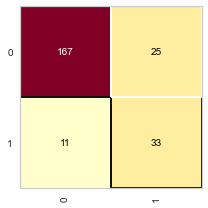

In [99]:
# Matriz de confusão
plt.figure(figsize=(3,3))
cm_rf = ConfusionMatrix(modelo_Final_rl)
cm_rf.fit(X_train, y_train)
cm_rf.score(X_val, y_val)

In [100]:
# Resultado em porcentagem
print(classification_report(y_val, y_pred_mf_rl))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       192
           1       0.57      0.75      0.65        44

    accuracy                           0.85       236
   macro avg       0.75      0.81      0.77       236
weighted avg       0.87      0.85      0.86       236



#### <font color='#D2691E'> Random forest

In [101]:
# Criar a variável do algoritmo - Random forest

modelo_Final_rf = RandomForestClassifier(bootstrap = 'False',
                                         criterion = 'entropy',
                                         max_depth = 10,
                                         max_features = 'log2',
                                         min_samples_leaf = 1,
                                         min_samples_split = 2,
                                         n_estimators = 300)

# Modelo treinado sobre treino + validação
modelo_Final_rf.fit( np.concatenate( (X_train, X_val) ), 
               np.concatenate((y_train, y_val)) )

RandomForestClassifier(bootstrap='False', criterion='entropy', max_depth=10,
                       max_features='log2', n_estimators=300)

In [102]:
# Fazendo a previsão
y_pred_mf_rf = modelo_Final_rf.predict(X_val)

In [103]:
# Matriz de confusão
cm_rf = confusion_matrix(y_val, y_pred_mf_rf)
cm_rf

array([[192,   0],
       [  0,  44]], dtype=int64)

1.0

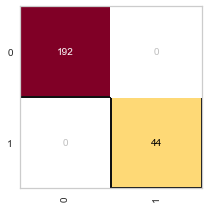

In [104]:
# Matriz de confusão
plt.figure(figsize=(3,3))
cm_rf = ConfusionMatrix(modelo_Final_rf)
cm_rf.fit(X_train, y_train)
cm_rf.score(X_val, y_val)

In [105]:
# Resultado em porcentagem
print(classification_report(y_val, y_pred_mf_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00        44

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236



#### <font color='#D2691E'> Comparando os modelos

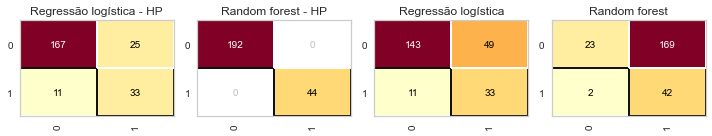

In [106]:
# Matrix de Confusão

plt.figure(figsize=(10,2))

plt.subplot(1,4,1)
plt.title('Regressão logística - HP',fontsize = 12)
cm_mf_rl = ConfusionMatrix(modelo_Final_rl)
cm_mf_rl.score(X_val, y_val);

plt.subplot(1,4,2)
plt.title('Random forest - HP',fontsize = 12)
cm_mf_rf = ConfusionMatrix(modelo_Final_rf)
cm_mf_rf.score(X_val, y_val);

plt.subplot(1,4,3)
plt.title('Regressão logística',fontsize = 12)
cm_rl = ConfusionMatrix(rl)
cm_rl.score(X_val, y_val);

plt.subplot(1,4,4)
plt.title('Random forest',fontsize = 12)
cm_rf = ConfusionMatrix(rf)
cm_rf.score(X_val, y_val);

In [107]:
# Dicionário de métricas - Regressão logística HP
yhat_test = modelo_Final_rl.predict( X_val )
acc_test = mt.accuracy_score( y_val, yhat_test )
mf_rl = {'F1 Score': str(round(f1_score(y_val, yhat_test)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_val, yhat_test)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_val, yhat_test)*100,2)) + "%"}

In [108]:
# Dicionário de métricas - Random forest HP
yhat_test = modelo_Final_rf.predict( X_val )
acc_test = mt.accuracy_score( y_val, yhat_test )
mf_rf = {'F1 Score': str(round(f1_score(y_val, yhat_test)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_val, yhat_test)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_val, yhat_test)*100,2)) + "%"}

In [109]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux1 = pd.DataFrame({'Regressão Logistica - HP':pd.Series(mf_rl),
                       'Random Forest - HP':pd.Series(mf_rf),
                       'Regressão Logistica':pd.Series(m_rl),
                       'Random Forest':pd.Series(m_rf)})

In [110]:
display(df_aux1)

,Regressão Logistica - HP,Random Forest - HP,Regressão Logistica,Random Forest
F1 Score,64.71%,100.0%,52.38%,32.94%
Acurácia,84.75%,100.0%,74.58%,27.54%
Precisão,56.9%,100.0%,40.24%,19.91%
Recall,75.0%,100.0%,75.0%,95.45%


**Nota:**
- O modelo **Random Forest - HP**, mostra que teve um Overfitting, ou seja, o algoritmo não consegue apreender um comportamento, não é capaz de generalizar que é a capacidade de acertar os dados que ele nunca viu.
- O modelo **Regressão Logistica - HP**	mostrou uma capacidade de generalização.

**Um ponto importante:** Estamos trabalhando com um Conjunto de Dados Pequeno, porque quanto mais dados significa que mais informações estou passando para o algoritmo treinar.

### <font color='#F37126'> 6.3. Modelo final

In [112]:
# Classificação sobre os dados de teste - Regressão Logistica

modelo_Final = LogisticRegression(C= 2.0,
                        intercept_scaling= 1.0, 
                        max_iter= 120, 
                        penalty= 'l2', 
                        solver= 'sag', 
                        tol= 0.1)

# Modelo treinado sobre treino + validação
modelo_Final.fit( np.concatenate( (X_train, X_val) ), 
               np.concatenate((y_train, y_val)) )

LogisticRegression(C=2.0, intercept_scaling=1.0, max_iter=120, solver='sag',
                   tol=0.1)

In [113]:
# Fazendo a previsão
y_pred_mf = modelo_Final.predict(X_test)

In [114]:
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_mf)
cm_rf

array([[223,  24],
       [ 22,  25]], dtype=int64)

0.8435374149659864

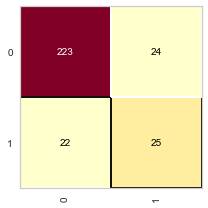

In [115]:
# Matriz de confusão
plt.figure(figsize=(3,3))
cm_rf = ConfusionMatrix(modelo_Final)
cm_rf.fit(np.concatenate( (X_train, X_val) ),
          np.concatenate((y_train, y_val)))
cm_rf.score(X_test, y_test)

In [116]:
# Resultado em porcentagem
print(classification_report(y_test, y_pred_mf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       247
           1       0.51      0.53      0.52        47

    accuracy                           0.84       294
   macro avg       0.71      0.72      0.71       294
weighted avg       0.85      0.84      0.84       294



In [117]:
# Dicionário de métricas - Random forest HP
yhat_test = modelo_Final.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
mf = {'F1 Score': str(round(f1_score(y_test, yhat_test)*100,2)) + "%",
        'Acurácia': str(round(acc_test *100,2)) + "%",
        'Precisão': str(round(precision_score(y_test, yhat_test)*100,2)) + "%",
        'Recall':   str(round(recall_score(y_test, yhat_test)*100,2)) + "%"}

In [118]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
df_aux2 = pd.DataFrame({'Regressão Logistica - HP':pd.Series(mf_rl),
                       'Random Forest - HP':pd.Series(mf_rf),
                       'Regressão Logistica':pd.Series(m_rl),
                       'Random Forest':pd.Series(m_rf),
                       'Regressão Logistica - Modelo Final':pd.Series(mf)})

In [119]:
display(df_aux2)

,Regressão Logistica - HP,Random Forest - HP,Regressão Logistica,Random Forest,Regressão Logistica - Modelo Final
F1 Score,64.71%,100.0%,52.38%,32.94%,52.08%
Acurácia,84.75%,100.0%,74.58%,27.54%,84.35%
Precisão,56.9%,100.0%,40.24%,19.91%,51.02%
Recall,75.0%,100.0%,75.0%,95.45%,53.19%


**Nota:**
- Como o contexto de negócio é classificar **a probabilidade de ficar na empresa ou de sair**, então vamos escolher o algoritmo de **Regressão Logistica**, porque toda vez que fazer uma classificação utilizando esta base de dados, quando queremos prever se ele vai ficar ou não na empresa, nós temos **84%** de chance em acertar está classificação.

# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO

**Explicação para o time de negócio**

- Contratar e reter funcionários são tarefas extremamente complexas que exigem capital, tempo e habilidades e a contratação de um novo funcionário custa em média **$7.645**, segundo a fonte mencionada no contexto de negócio.
- Então usando o modelo de classificação podemos identificar cerca de **84%** de chance em acertar está classificação, mas com uma precisão de **51%** surgindo uma oportunidade para o departamento de RH reduzir um desperdício de contratação.

In [120]:
# criar o DataFrame
df = pd.DataFrame({
    'Custo:':              ['$7.645'],
    'Quantidade:':         ['500'],
    'Total:':              ['$3.822.500'],
    'Classificação:':      ['420'],
    'Precisão do modelo:': ['214'],
    'Oportunidade:':       ['$1.636.030']
})

# trocar as colunas pelas linhas, adicionando um índice numérico para cada linha
df = df.transpose().reset_index().rename(columns={'index': 'Descrição', 0: 'Valor'})



# imprimir a tabela formatada
#print(df.to_string(index=False))

display(df.style.set_properties(subset=['Valor'], **{'color': '#000000', 'font-weight': 'bold'}))

,Descrição,Valor
0,Custo:,$7.645
1,Quantidade:,500
2,Total:,$3.822.500
3,Classificação:,420
4,Precisão do modelo:,214
5,Oportunidade:,$1.636.030


**Nota:**
- A base para teste do modelo é pequena, com uma base de dados maior, podemos melhorar o resultado do algortmo.

# <font color='red'> 8 - IMPLEMENTAR O MODELO PARA A PRODUÇÃO

### <font color='#F37126'> 8.1. Salvando o arquivo

In [121]:
# salvando as variáveis
with open('variaveis_modelo.pkl', 'wb') as f:
    pickle.dump([scaler, preprocessor, modelo_Final], f)

### <font color='#F37126'> 8.2. Aplicando uma simulação

In [122]:
# Abrir o arquivo
with open('variaveis_modelo.pkl', 'rb') as f:
    min_max, encoder, model = pickle.load(f)

In [123]:
# Valores
min_max, encoder, model

(MinMaxScaler(),
 ColumnTransformer(remainder='passthrough',
                   transformers=[('encoder', OneHotEncoder(),
                                  ['BusinessTravel', 'Department',
                                   'EducationField', 'Gender', 'JobRole',
                                   'MaritalStatus'])]),
 LogisticRegression(C=2.0, intercept_scaling=1.0, max_iter=120, solver='sag',
                    tol=0.1))

In [124]:
df_funcionario = pd.read_csv('Datasets/Human_Resources.csv')

In [125]:
df_funcionario.shape

(1470, 35)

In [126]:
# Testando com um novo funcionário (buscando na mesma tabela para testar)
df_funcionario = df_funcionario.iloc[3:4]
df_funcionario

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0


**Nota:**
- Objetivo é descobrir se este funcionário tem chance em sair da empresa ou não.

#### <font color='#D2691E'> Transformação dos atributos categóricos

In [127]:
df_funcionario['OverTime'] = df_funcionario['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [128]:
df_funcionario.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [129]:
# Selecionando os atributos categóricos
X_cat_novo = df_funcionario
X_cat_novo.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0


In [130]:
X_cat_novo.shape

(1, 31)

In [131]:
# Aplicação do one hot enconder
X_cat_novo = encoder.transform(X_cat_novo)

In [132]:
X_cat_novo

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 3.3000e+01, 1.3920e+03, 3.0000e+00, 4.0000e+00,
        4.0000e+00, 5.6000e+01, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        2.9090e+03, 2.3159e+04, 1.0000e+00, 1.0000e+00, 1.1000e+01,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 8.0000e+00, 3.0000e+00,
        3.0000e+00, 8.0000e+00, 7.0000e+00, 3.0000e+00, 0.0000e+00]])

In [133]:
# Transformando para dataframe
X_cat_novo = pd.DataFrame(X_cat_novo)

In [134]:
X_cat_novo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33.0,1392.0,3.0,4.0,4.0,56.0,3.0,1.0,3.0,2909.0,23159.0,1.0,1.0,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0


#### <font color='#D2691E'> Transformação Rescaling

In [135]:
# Transformando os dados para a mesma escala
X_novo = min_max.transform(X_cat_novo)

#### <font color='#D2691E'> Previsão

In [136]:
model.predict(X_novo)

array([0], dtype=int64)

In [137]:
# Probabilidade
model.predict_proba(X_novo)

array([[0.85712751, 0.14287249]])

In [138]:
model.classes_

array([0, 1], dtype=int64)

**Nota:**

- No/0 = Não tem chance de sair da empresa
- Yes/1 = Chance em sair da empresa
- O algoritmo classificou 86% de certeza que este funcionário não tem a probabilidade em sair da empresa e 14% com a probabilidade em sair da empresa.

**Ponto importante:** Para pessoas com a probabilidade em sair da empresa o algoritmo não está se ajustando muito bem, isso pode ser devido o pouco dados que temos na base.

# <font color='red'> 9 - PRÓXIMOS PASSOS

- Coletar mais informações para que o algoritmo possa aprender um comportamento das pessoas que tem a probabilidade em sair da empresa.
- Gerar novas features (Características), para alcançar um equilibrio e para manter o algoritmo complexo suficiente para ele entedener o comportamento, mas não tão complexo ao ponto dele decorar.